A1. If your project deals with a regression problem, please use one attribute of your dataset
(X_train) along with the target values (y_train) for training a linear regression model. Sample code
suggested below.
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
(P.S.: If your project deals with a classification or clustering problem, please consider one of the
attributes with numerical values as target values.)

In [12]:
import pandas as pd                          # Import pandas for data manipulation
from sklearn.linear_model import LinearRegression  # Import LinearRegression model
from sklearn.model_selection import train_test_split  # Import train_test_split for splitting data
from sklearn.metrics import mean_squared_error       # Import MSE for evaluation

# --- Step 1: Load the Dataset ---
# Load the Excel file (update file path as needed)
df = pd.read_excel("20230409_playback_data_for_upload.xlsx")

# --- Step 2: Select Feature and Target ---
# For regression, choose one attribute as the feature (X) and another as the target (y)
# Here, we assume "TimeSetUp" is the predictor and "DurVigPost" is the target variable.
# Replace these column names with ones relevant to your dataset if needed.
X = df[['TimeSetUp']]        # Predictor variable (ensure it's in a DataFrame)
y = df['DurVigPost']         # Target variable (a Series)

# --- Step 3: Split the Data ---
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 4: Train the Linear Regression Model ---
# Create an instance of the LinearRegression model and train it on the training data
reg = LinearRegression().fit(X_train, y_train)

# --- Step 5: Predict on the Training Data ---
# Use the trained model to predict the target values for the training set
y_train_pred = reg.predict(X_train)

# --- Optional: Evaluate the Model ---
# Compute the Mean Squared Error (MSE) on the training data to assess performance
mse = mean_squared_error(y_train, y_train_pred)
print("Training MSE:", mse)


Training MSE: 424.1316973959931


2. Calculate MSE, RMSE, MAPE and R2 scores for prediction made by the trained model in A1.  
Perform prediction on the test data and compare the metric values between train and test set.

In [17]:
import pandas as pd                              # Import pandas for data manipulation
import numpy as np                               # Import numpy for numerical operations
from sklearn.linear_model import LinearRegression  # Import LinearRegression for regression modeling
from sklearn.model_selection import train_test_split  # Import train_test_split for splitting data
from sklearn.metrics import mean_squared_error, r2_score  # Import evaluation metrics
from sklearn.impute import SimpleImputer         # Import SimpleImputer for handling missing values

# --- Step 1: Load the Dataset ---
df = pd.read_excel("20230409_playback_data_for_upload.xlsx")  # Load the dataset (update file path if needed)
print("First few rows of the dataset:")
print(df.head())

# --- Step 2: Select Features and Target (Using Two Other Attributes) ---
# We choose "DurVigPre" and "NumVocPost" as predictors and "DurVigPost" as the target.
if "DurVigPost" in df.columns and "DurVigPre" in df.columns and "NumVocPost" in df.columns:
    y = df["DurVigPost"]                              # Target variable: duration of vigilance post
    X = df[["DurVigPre", "NumVocPost"]]                # Predictor variables: duration of vigilance pre and number of voc post
else:
    raise ValueError("One or more required columns ('DurVigPost', 'DurVigPre', 'NumVocPost') are missing.")

# --- Step 3: Handle Missing Values in the Predictors ---
imputer = SimpleImputer(strategy="mean")              # Create an imputer to replace missing values with the mean
X_imputed = imputer.fit_transform(X)                  # Impute missing values in predictors

# --- Step 4: Split the Data ---
# Split data into training (80%) and test (20%) sets.
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# --- Step 5: Train the Linear Regression Model ---
reg = LinearRegression().fit(X_train, y_train)        # Train the model on the training data

# --- Step 6: Predict on Training and Test Data ---
y_train_pred = reg.predict(X_train)                   # Predict target values for training set
y_test_pred = reg.predict(X_test)                     # Predict target values for test set

# --- Step 7: Define a function to calculate MAPE ---
def calculateMAPE(yTrue, yPred):
    """
    Calculate the Mean Absolute Percentage Error (MAPE).

    Parameters:
        yTrue (array-like): Actual target values.
        yPred (array-like): Predicted target values.

    Returns:
        float: MAPE value as a percentage.
    """
    # Replace zero values in yTrue to avoid division by zero
    yTrue = np.where(yTrue == 0, 1e-10, yTrue)
    return np.mean(np.abs((yTrue - yPred) / yTrue)) * 100

# --- Step 8: Compute Evaluation Metrics for Training Data ---
train_mse = mean_squared_error(y_train, y_train_pred)   # Calculate MSE for training set
train_rmse = np.sqrt(train_mse)                           # Calculate RMSE for training set
train_mape = calculateMAPE(y_train.values, y_train_pred)  # Calculate MAPE for training set
train_r2 = r2_score(y_train, y_train_pred)                # Calculate R² for training set

# --- Step 9: Compute Evaluation Metrics for Test Data ---
test_mse = mean_squared_error(y_test, y_test_pred)        # Calculate MSE for test set
test_rmse = np.sqrt(test_mse)                             # Calculate RMSE for test set
test_mape = calculateMAPE(y_test.values, y_test_pred)     # Calculate MAPE for test set
test_r2 = r2_score(y_test, y_test_pred)                   # Calculate R² for test set

# --- Step 10: Print the Evaluation Metrics ---
print("\nTraining Metrics (Using 'DurVigPre' and 'NumVocPost'):")
print(f"MSE: {train_mse:.3f}")
print(f"RMSE: {train_rmse:.3f}")
print(f"MAPE: {train_mape:.3f}%")
print(f"R²: {train_r2:.3f}")

print("\nTest Metrics (Using 'DurVigPre' and 'NumVocPost'):")
print(f"MSE: {test_mse:.3f}")
print(f"RMSE: {test_rmse:.3f}")
print(f"MAPE: {test_mape:.3f}%")
print(f"R²: {test_r2:.3f}")

# --- Step 11: Determine the Fit Status ---
# Criteria:
# - Overfit: Training R² is at least 0.1 higher than test R².
# - Underfit: Both training and test R² are less than 0.5.
# - Regular fit: Otherwise.
if (train_r2 - test_r2) > 0.1:
    fitStatus = "Overfit"
elif train_r2 < 0.5 and test_r2 < 0.5:
    fitStatus = "Underfit"
else:
    fitStatus = "Regular fit"

print("\nFit Status:", fitStatus)


First few rows of the dataset:
       Date  Time Subject  Caller Relationship_Caller_OgRecvr  \
0  20211018   935     R24     R23                         Mom   
1  20211021  1238  R22.89     R24                      OldA2A   
2  20211023  1050     R26  R25.03                      AgeMts   
3  20211025  1029  R23.93     R24                      OldA2A   
4  20211028   942  R22.89     R24                      OldA2A   

   CallerDirecKnown  Dist2Caller Dist2AltRecvr Treatment  TimeSetUp  ...  \
0                 0          NaN           NaN         C   316.5865  ...   
1                 1        450.0           450         C   202.2489  ...   
2                 0          NaN           NaN         C   256.7333  ...   
3                 0          NaN           NaN         T   160.6238  ...   
4                 1        411.4         411.4         T   107.7457  ...   

   LatVig  VigCen  LatApr  AprCen  NumVocPre  NumVocPost DurVigPre  \
0   2.029       1   600.0       0        0.0       


3. Repeat the exercises A1 and A2 with more than one attribute or all attributes.

In [16]:
import pandas as pd                              # Import pandas for data manipulation
import numpy as np                               # Import numpy for numerical operations
from sklearn.linear_model import LinearRegression  # Import LinearRegression for regression modeling
from sklearn.model_selection import train_test_split  # Import train_test_split for splitting data
from sklearn.metrics import mean_squared_error, r2_score  # Import evaluation metrics
from sklearn.impute import SimpleImputer         # Import SimpleImputer for handling missing values

# --- Step 1: Load the Dataset ---
# Load the dataset from the Excel file (update file path as needed)
df = pd.read_excel("20230409_playback_data_for_upload.xlsx")
print("First few rows of the dataset:")
print(df.head())

# --- Step 2: Select Features and Target (Multiple Attributes) ---
# Select only numerical columns from the DataFrame
dfNumeric = df.select_dtypes(include=['number'])

# Assume "DurVigPost" is the target variable and all other numerical columns are predictors
if "DurVigPost" in dfNumeric.columns:
    y = dfNumeric["DurVigPost"]                  # Target variable
    X = dfNumeric.drop(columns=["DurVigPost"])     # Predictor variables: all other numerical columns
else:
    raise ValueError("Target column 'DurVigPost' not found in dataset.")

# --- Step 3: Impute Missing Values in the Predictor Variables ---
# Create an imputer to replace missing values with the column mean
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)             # Impute missing values in X

# --- Step 4: Split the Data ---
# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# --- Step 5: Train the Linear Regression Model ---
# Create and train the LinearRegression model using the training data
reg = LinearRegression().fit(X_train, y_train)

# --- Step 6: Predict on Training and Test Data ---
y_train_pred = reg.predict(X_train)  # Predict target values for the training set
y_test_pred = reg.predict(X_test)    # Predict target values for the test set

# --- Step 7: Compute Evaluation Metrics ---
# Calculate Mean Squared Error (MSE) and R² score for the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate Mean Squared Error (MSE) and R² score for the test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# --- Step 8: Print Evaluation Metrics ---
print("\nTraining Metrics (Multiple Attributes):")
print(f"MSE: {train_mse:.3f}")
print(f"R²: {train_r2:.3f}")

print("\nTest Metrics (Multiple Attributes):")
print(f"MSE: {test_mse:.3f}")
print(f"R²: {test_r2:.3f}")

# --- Step 9: Determine Fit Status ---
# Criteria (thresholds can be adjusted):
# - Overfit: training R² is at least 0.1 higher than test R².
# - Underfit: both training and test R² are less than 0.5.
# - Regular fit: Otherwise.
if (train_r2 - test_r2) > 0.1:
    fitStatus = "Overfit"
elif train_r2 < 0.5 and test_r2 < 0.5:
    fitStatus = "Underfit"
else:
    fitStatus = "Regular fit"

print("\nFit Status:", fitStatus)


First few rows of the dataset:
       Date  Time Subject  Caller Relationship_Caller_OgRecvr  \
0  20211018   935     R24     R23                         Mom   
1  20211021  1238  R22.89     R24                      OldA2A   
2  20211023  1050     R26  R25.03                      AgeMts   
3  20211025  1029  R23.93     R24                      OldA2A   
4  20211028   942  R22.89     R24                      OldA2A   

   CallerDirecKnown  Dist2Caller Dist2AltRecvr Treatment  TimeSetUp  ...  \
0                 0          NaN           NaN         C   316.5865  ...   
1                 1        450.0           450         C   202.2489  ...   
2                 0          NaN           NaN         C   256.7333  ...   
3                 0          NaN           NaN         T   160.6238  ...   
4                 1        411.4         411.4         T   107.7457  ...   

   LatVig  VigCen  LatApr  AprCen  NumVocPre  NumVocPost DurVigPre  \
0   2.029       1   600.0       0        0.0       

4. Perform k-means clustering on your data. Please remove / ignore the target variable for
performing clustering.

Sheet names and first few rows of the dataset loaded:
       Date  Time Subject  Caller Relationship_Caller_OgRecvr  \
0  20211018   935     R24     R23                         Mom   
1  20211021  1238  R22.89     R24                      OldA2A   
2  20211023  1050     R26  R25.03                      AgeMts   
3  20211025  1029  R23.93     R24                      OldA2A   
4  20211028   942  R22.89     R24                      OldA2A   

   CallerDirecKnown  Dist2Caller Dist2AltRecvr Treatment  TimeSetUp  ...  \
0                 0          NaN           NaN         C   316.5865  ...   
1                 1        450.0           450         C   202.2489  ...   
2                 0          NaN           NaN         C   256.7333  ...   
3                 0          NaN           NaN         T   160.6238  ...   
4                 1        411.4         411.4         T   107.7457  ...   

   LatVig  VigCen  LatApr  AprCen  NumVocPre  NumVocPost DurVigPre  \
0   2.029       1   600.0   

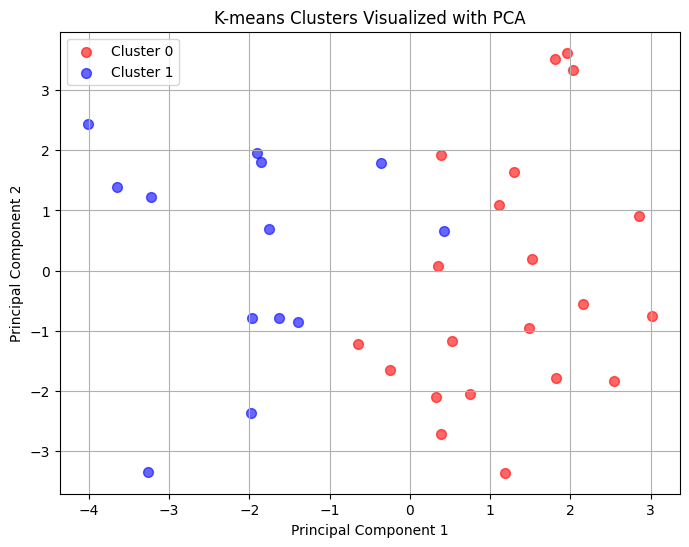

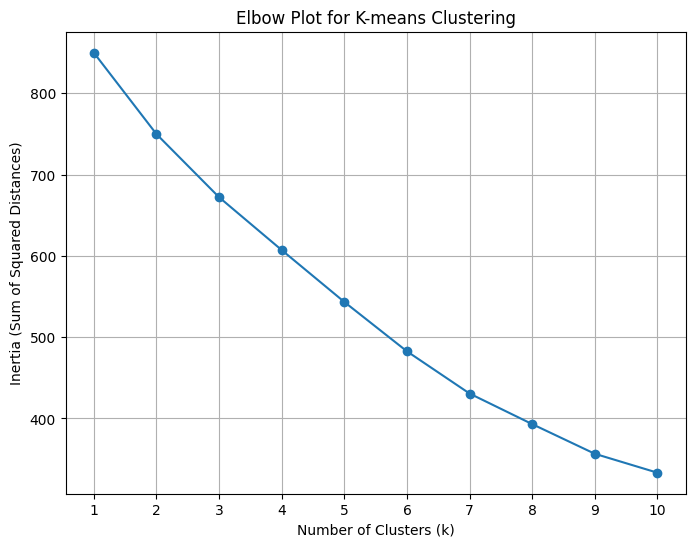


Elbow Plot Inertias for each k:
k = 1: Inertia = 850.000
k = 2: Inertia = 749.876
k = 3: Inertia = 672.182
k = 4: Inertia = 607.182
k = 5: Inertia = 543.348
k = 6: Inertia = 482.583
k = 7: Inertia = 430.660
k = 8: Inertia = 393.027
k = 9: Inertia = 356.529
k = 10: Inertia = 333.237


In [11]:
import pandas as pd                                # Import pandas for data manipulation
import matplotlib.pyplot as plt                    # Import matplotlib for plotting
from sklearn.cluster import KMeans                 # Import KMeans for clustering
from sklearn.preprocessing import StandardScaler   # Import StandardScaler for standardizing data
from sklearn.impute import SimpleImputer           # Import SimpleImputer for handling missing values
from sklearn.decomposition import PCA              # Import PCA for dimensionality reduction

# ----------------- Function Definitions -----------------

def loadExcelData(filePath: str) -> pd.DataFrame:
    """
    Loads data from the first sheet of an Excel file.

    Parameters:
        filePath (str): Path to the Excel file.

    Returns:
        pd.DataFrame: DataFrame containing the loaded data.
    """
    excelFile = pd.ExcelFile(filePath)  # Load the Excel file using the file path
    df = pd.read_excel(excelFile, sheet_name=excelFile.sheet_names[0])  # Retrieve data from the first sheet
    return df  # Return the loaded DataFrame

def preprocessDataframe(df: pd.DataFrame) -> pd.DataFrame:
    """
    Selects numerical columns from the DataFrame, imputes missing values using the mean,
    and standardizes the data.

    Parameters:
        df (pd.DataFrame): The original DataFrame.

    Returns:
        dfScaled (np.ndarray): Standardized numerical data.
        dfNumeric (pd.DataFrame): The DataFrame with only numerical columns.
    """
    dfNumeric = df.select_dtypes(include=['number'])  # Select only numeric columns from the DataFrame

    imputer = SimpleImputer(strategy="mean")  # Create an imputer that fills missing values with the column mean
    dfImputed = imputer.fit_transform(dfNumeric)  # Apply imputer on the numeric data

    scaler = StandardScaler()  # Create a scaler to standardize the numeric data
    dfScaled = scaler.fit_transform(dfImputed)  # Standardize the imputed data

    return dfScaled, dfNumeric  # Return the standardized data and the numeric DataFrame

def performKmeans(data, nClusters: int) -> KMeans:
    """
    Performs k-means clustering on the given data.

    Parameters:
        data (array-like): Preprocessed data (standardized numerical data).
        nClusters (int): Number of clusters for k-means.

    Returns:
        KMeans: Fitted k-means model.
    """
    kmeansModel = KMeans(n_clusters=nClusters, random_state=0, n_init=10)  # Initialize KMeans model
    kmeansModel.fit(data)  # Fit the model to the data
    return kmeansModel  # Return the fitted model

def performPca(data, nComponents: int = 2):
    """
    Applies PCA to reduce the dimensions of the data.

    Parameters:
        data (array-like): Preprocessed data (standardized numerical data).
        nComponents (int): Number of principal components.

    Returns:
        principalComponents (np.ndarray): Transformed data in principal component space.
    """
    pcaModel = PCA(n_components=nComponents)  # Initialize PCA with the desired number of components
    principalComponents = pcaModel.fit_transform(data)  # Fit PCA on the data and transform it
    return principalComponents  # Return the transformed data

def plotClustersPca(principalComponents, clusterLabels):
    """
    Plots the clusters in 2D using the first two principal components.

    Parameters:
        principalComponents (np.ndarray): 2D data from PCA.
        clusterLabels (array-like): Cluster labels for each data point.
    """
    # Create a DataFrame from the PCA results for easier plotting
    pcaDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
    pcaDf['Cluster'] = clusterLabels  # Add the cluster labels to the DataFrame

    colors = ['red', 'blue', 'green', 'orange', 'purple']  # Define colors for different clusters

    plt.figure(figsize=(8, 6))  # Create a new figure with specified dimensions
    for cluster in sorted(pcaDf['Cluster'].unique()):  # Loop through each unique cluster label
        subset = pcaDf[pcaDf['Cluster'] == cluster]  # Filter data for the current cluster
        plt.scatter(subset['PC1'], subset['PC2'],
                    s=50,  # Set marker size
                    c=colors[cluster % len(colors)],  # Select a color based on the cluster index
                    label=f'Cluster {cluster}',  # Label for the cluster
                    alpha=0.6)  # Set transparency for better visualization

    plt.title('K-means Clusters Visualized with PCA')  # Set plot title
    plt.xlabel('Principal Component 1')  # Label for x-axis
    plt.ylabel('Principal Component 2')  # Label for y-axis
    plt.legend()  # Add legend to the plot
    plt.grid(True)  # Enable grid lines
    plt.show()  # Display the plot

def createElbowPlot(data, kRange: range):
    """
    Creates an elbow plot by computing the k-means inertia (sum of squared distances)
    for each k value in the given range.

    Parameters:
        data (array-like): Preprocessed data (standardized numerical data).
        kRange (range): Range of k values to evaluate.

    Returns:
        inertias (list): List of inertia values corresponding to each k.
    """
    inertias = []  # Initialize an empty list to store inertia values
    for k in kRange:  # Loop through each k value in the provided range
        kmeansModel = KMeans(n_clusters=k, random_state=0, n_init=10)  # Initialize KMeans with current k
        kmeansModel.fit(data)  # Fit the model to the data
        inertias.append(kmeansModel.inertia_)  # Append the inertia to the list

    plt.figure(figsize=(8, 6))  # Create a new figure for the elbow plot
    plt.plot(list(kRange), inertias, marker='o', linestyle='-')  # Plot inertia versus k values
    plt.title('Elbow Plot for K-means Clustering')  # Set the title of the plot
    plt.xlabel('Number of Clusters (k)')  # Label for the x-axis
    plt.ylabel('Inertia (Sum of Squared Distances)')  # Label for the y-axis
    plt.xticks(list(kRange))  # Set x-axis ticks to the k values
    plt.grid(True)  # Enable grid lines
    plt.show()  # Display the elbow plot

    return inertias  # Return the list of inertia values

# ----------------- Main Program -----------------

if __name__ == "__main__":
    filePath = "20230409_playback_data_for_upload.xlsx"  # File path for the Excel data file (update as needed)

    dataDf = loadExcelData(filePath)  # Load the dataset from the Excel file using the defined function
    print("Sheet names and first few rows of the dataset loaded:")  # Print header information
    print(dataDf.head())  # Print the first few rows of the loaded dataset

    dataScaled, dataNumeric = preprocessDataframe(dataDf)  # Preprocess the data (select numeric, impute, standardize)

    kValue = 2  # Define the number of clusters for k-means clustering
    kmeansModel = performKmeans(dataScaled, nClusters=kValue)  # Perform k-means clustering on the standardized data
    dataDf['Cluster'] = kmeansModel.labels_  # Add the cluster labels to the original DataFrame

    print("\nCluster Centers (in standardized space) for k=2:")  # Print header for cluster centers
    print(kmeansModel.cluster_centers_)  # Print the cluster centers (in standardized space)
    print("\nData with Cluster Labels (first 5 rows):")  # Print header for cluster labels
    print(dataDf[['Cluster']].head())  # Print the first 5 rows of the DataFrame with cluster labels

    principalComponents = performPca(dataScaled, nComponents=2)  # Perform PCA on the standardized data to reduce dimensions
    plotClustersPca(principalComponents, kmeansModel.labels_)  # Plot the clusters in the 2D PCA space

    kValuesRange = range(1, 11)  # Define a range of k values from 1 to 10 for the elbow plot
    elbowInertias = createElbowPlot(dataScaled, kRange=kValuesRange)  # Create the elbow plot by evaluating inertia for each k

    print("\nElbow Plot Inertias for each k:")  # Print header for elbow plot inertias
    for k, inertia in zip(kValuesRange, elbowInertias):  # Loop through k values and corresponding inertias
        print(f"k = {k}: Inertia = {inertia:.3f}")  # Print the inertia value for each k


A5. For the clustering done in A4, calculate the: (i) Silhouette Score, (ii) CH Score and (iii) DB Index.

Sheet names and first few rows of the dataset loaded:
       Date  Time Subject  Caller Relationship_Caller_OgRecvr  \
0  20211018   935     R24     R23                         Mom   
1  20211021  1238  R22.89     R24                      OldA2A   
2  20211023  1050     R26  R25.03                      AgeMts   
3  20211025  1029  R23.93     R24                      OldA2A   
4  20211028   942  R22.89     R24                      OldA2A   

   CallerDirecKnown  Dist2Caller Dist2AltRecvr Treatment  TimeSetUp  ...  \
0                 0          NaN           NaN         C   316.5865  ...   
1                 1        450.0           450         C   202.2489  ...   
2                 0          NaN           NaN         C   256.7333  ...   
3                 0          NaN           NaN         T   160.6238  ...   
4                 1        411.4         411.4         T   107.7457  ...   

   LatVig  VigCen  LatApr  AprCen  NumVocPre  NumVocPost DurVigPre  \
0   2.029       1   600.0   

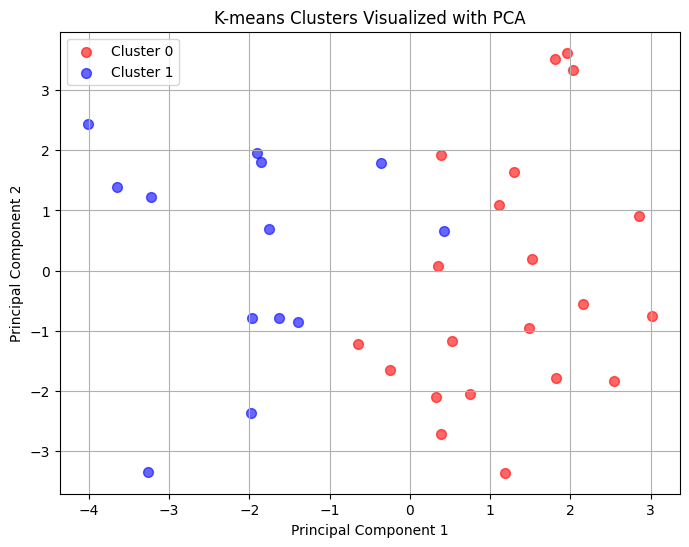


Clustering Evaluation Metrics:
Silhouette Score: 0.101
Calinski-Harabasz Score: 4.273
Davies-Bouldin Index: 2.576


In [10]:
import pandas as pd                                # Import pandas for data manipulation
import matplotlib.pyplot as plt                    # Import matplotlib for plotting
from sklearn.cluster import KMeans                 # Import KMeans for clustering
from sklearn.preprocessing import StandardScaler   # Import StandardScaler for data standardization
from sklearn.impute import SimpleImputer           # Import SimpleImputer for handling missing values
from sklearn.decomposition import PCA              # Import PCA for dimensionality reduction
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score  # Import evaluation metrics

# ----------------- Function Definitions -----------------

def loadExcelData(filePath: str) -> pd.DataFrame:
    """
    Loads data from the first sheet of an Excel file.

    Parameters:
        filePath (str): Path to the Excel file.

    Returns:
        pd.DataFrame: DataFrame containing the loaded data.
    """
    excelFile = pd.ExcelFile(filePath)                # Load the Excel file using the provided file path
    df = pd.read_excel(excelFile, sheet_name=excelFile.sheet_names[0])  # Load data from the first sheet
    return df                                        # Return the loaded DataFrame

def preprocessDataframe(df: pd.DataFrame) -> (pd.DataFrame, pd.DataFrame):
    """
    Selects numerical columns from the DataFrame, imputes missing values using the mean,
    and standardizes the data.

    Parameters:
        df (pd.DataFrame): The original DataFrame.

    Returns:
        dfScaled (np.ndarray): Standardized numerical data.
        dfNumeric (pd.DataFrame): DataFrame containing only numerical columns.
    """
    dfNumeric = df.select_dtypes(include=['number'])  # Select only numeric columns from the DataFrame
    imputer = SimpleImputer(strategy="mean")            # Create an imputer to replace missing values with the column mean
    dfImputed = imputer.fit_transform(dfNumeric)        # Impute missing values in the numeric DataFrame
    scaler = StandardScaler()                           # Create a scaler for standardizing the numeric data
    dfScaled = scaler.fit_transform(dfImputed)          # Standardize the imputed data
    return dfScaled, dfNumeric                          # Return the standardized data and numeric DataFrame

def performKmeans(data, nClusters: int) -> KMeans:
    """
    Performs k-means clustering on the given data.

    Parameters:
        data (array-like): Standardized numerical data.
        nClusters (int): Number of clusters for k-means.

    Returns:
        KMeans: Fitted k-means model.
    """
    kmeansModel = KMeans(n_clusters=nClusters, random_state=0, n_init=10)  # Initialize the KMeans model with the specified number of clusters
    kmeansModel.fit(data)                            # Fit the k-means model to the standardized data
    return kmeansModel                               # Return the fitted model

def performPca(data, nComponents: int = 2):
    """
    Applies PCA to reduce the dimensions of the data.

    Parameters:
        data (array-like): Standardized numerical data.
        nComponents (int): Number of principal components to retain.

    Returns:
        principalComponents (np.ndarray): Data transformed into the principal component space.
    """
    pcaModel = PCA(n_components=nComponents)         # Initialize PCA with the specified number of components
    principalComponents = pcaModel.fit_transform(data)  # Fit PCA to the data and transform it
    return principalComponents                       # Return the transformed data

def plotClustersPca(principalComponents, clusterLabels):
    """
    Plots the clusters in 2D using the first two principal components.

    Parameters:
        principalComponents (np.ndarray): 2D PCA-transformed data.
        clusterLabels (array-like): Cluster labels for each data point.
    """
    pcaDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])  # Create a DataFrame from PCA results
    pcaDf['Cluster'] = clusterLabels                 # Add cluster labels to the DataFrame
    colors = ['red', 'blue', 'green', 'orange', 'purple']  # Define colors for plotting clusters
    plt.figure(figsize=(8, 6))                         # Create a new figure with specified dimensions
    for cluster in sorted(pcaDf['Cluster'].unique()):  # Loop through each unique cluster label
        subset = pcaDf[pcaDf['Cluster'] == cluster]    # Filter the DataFrame for the current cluster
        plt.scatter(subset['PC1'], subset['PC2'],
                    s=50,                            # Set marker size
                    c=colors[cluster % len(colors)], # Choose a color based on cluster index
                    label=f'Cluster {cluster}',       # Set the label for the cluster
                    alpha=0.6)                        # Set transparency for better visualization
    plt.title('K-means Clusters Visualized with PCA')  # Set the plot title
    plt.xlabel('Principal Component 1')              # Label the x-axis
    plt.ylabel('Principal Component 2')              # Label the y-axis
    plt.legend()                                     # Add a legend to the plot
    plt.grid(True)                                   # Enable grid lines
    plt.show()                                       # Display the plot

def evaluateClusteringMetrics(data, clusterLabels) -> (float, float, float):
    """
    Computes clustering evaluation metrics: Silhouette Score, Calinski-Harabasz Score, and Davies-Bouldin Index.

    Parameters:
        data (array-like): Standardized numerical data.
        clusterLabels (array-like): Cluster labels for each data point.

    Returns:
        silhouette (float): Silhouette Score.
        calinskiHarabasz (float): Calinski-Harabasz Score.
        daviesBouldin (float): Davies-Bouldin Index.
    """
    silhouette = silhouette_score(data, clusterLabels)               # Compute the Silhouette Score
    calinskiHarabasz = calinski_harabasz_score(data, clusterLabels)     # Compute the Calinski-Harabasz Score
    daviesBouldin = davies_bouldin_score(data, clusterLabels)          # Compute the Davies-Bouldin Index
    return silhouette, calinskiHarabasz, daviesBouldin                   # Return the computed metrics

# ----------------- Main Program -----------------

if __name__ == "__main__":
    filePath = "20230409_playback_data_for_upload.xlsx"  # Specify the path to the Excel data file
    dataDf = loadExcelData(filePath)                      # Load the dataset from the Excel file
    print("Sheet names and first few rows of the dataset loaded:")  # Print a header for clarity
    print(dataDf.head())                                  # Print the first few rows of the loaded dataset

    dataScaled, dataNumeric = preprocessDataframe(dataDf)  # Preprocess the data (select numeric columns, impute, and standardize)

    kValue = 2                                           # Define the number of clusters for k-means clustering
    kmeansModel = performKmeans(dataScaled, nClusters=kValue)  # Perform k-means clustering on the standardized data
    dataDf['Cluster'] = kmeansModel.labels_              # Add the cluster labels from k-means to the original DataFrame

    print("\nCluster Centers (in standardized space) for k=2:")  # Print header for cluster centers
    print(kmeansModel.cluster_centers_)                 # Print the cluster centers (in standardized space)
    print("\nData with Cluster Labels (first 5 rows):")  # Print header for cluster labels
    print(dataDf[['Cluster']].head())                   # Print the first 5 rows with cluster labels

    principalComponents = performPca(dataScaled, nComponents=2)  # Reduce dimensions using PCA for visualization
    plotClustersPca(principalComponents, kmeansModel.labels_)  # Plot the clusters in a 2D PCA space

    silhouette, calinskiHarabasz, daviesBouldin = evaluateClusteringMetrics(dataScaled, kmeansModel.labels_)  # Evaluate clustering metrics
    print("\nClustering Evaluation Metrics:")          # Print header for evaluation metrics
    print(f"Silhouette Score: {silhouette:.3f}")         # Print the Silhouette Score
    print(f"Calinski-Harabasz Score: {calinskiHarabasz:.3f}")  # Print the Calinski-Harabasz Score
    print(f"Davies-Bouldin Index: {daviesBouldin:.3f}")   # Print the Davies-Bouldin Index


A6. Perform k-means clustering for different values of k. Evaluate the above scores for each k value.
Make a plot of the values against the k value to determine the optimal cluster count.

Sheet names and first few rows of the dataset loaded:
       Date  Time Subject  Caller Relationship_Caller_OgRecvr  \
0  20211018   935     R24     R23                         Mom   
1  20211021  1238  R22.89     R24                      OldA2A   
2  20211023  1050     R26  R25.03                      AgeMts   
3  20211025  1029  R23.93     R24                      OldA2A   
4  20211028   942  R22.89     R24                      OldA2A   

   CallerDirecKnown  Dist2Caller Dist2AltRecvr Treatment  TimeSetUp  ...  \
0                 0          NaN           NaN         C   316.5865  ...   
1                 1        450.0           450         C   202.2489  ...   
2                 0          NaN           NaN         C   256.7333  ...   
3                 0          NaN           NaN         T   160.6238  ...   
4                 1        411.4         411.4         T   107.7457  ...   

   LatVig  VigCen  LatApr  AprCen  NumVocPre  NumVocPost DurVigPre  \
0   2.029       1   600.0   

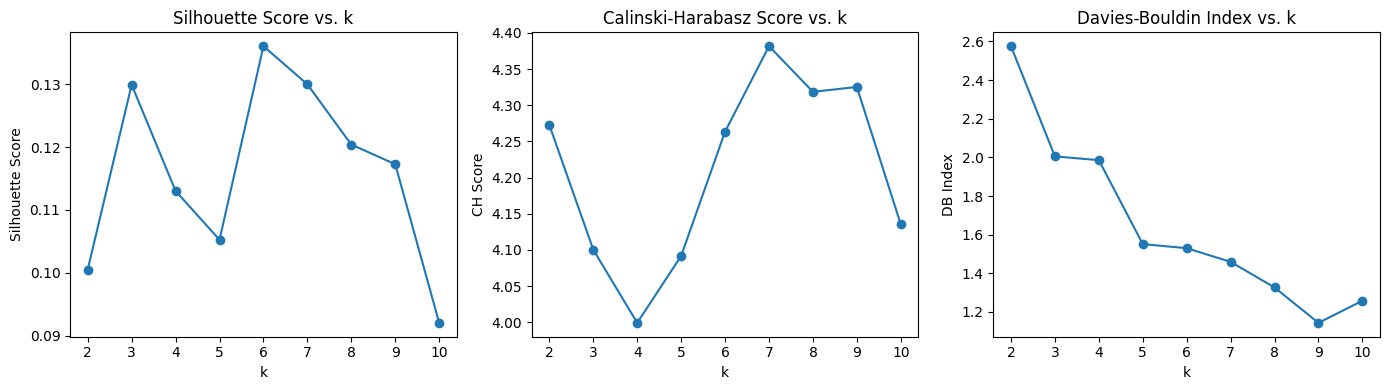

In [8]:
import pandas as pd                               # Import pandas for data manipulation
import matplotlib.pyplot as plt                   # Import matplotlib for plotting
from sklearn.cluster import KMeans                # Import KMeans for clustering
from sklearn.preprocessing import StandardScaler  # Import StandardScaler for data standardization
from sklearn.impute import SimpleImputer          # Import SimpleImputer for handling missing values
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score  # Import clustering evaluation metrics

# ----------------- Function Definitions -----------------

def loadExcelData(filePath: str) -> pd.DataFrame:
    """
    Loads data from the first sheet of an Excel file.

    Parameters:
        filePath (str): The path to the Excel file.

    Returns:
        pd.DataFrame: DataFrame containing the loaded data.
    """
    excelFile = pd.ExcelFile(filePath)                  # Load the Excel file using the provided file path
    df = pd.read_excel(excelFile, sheet_name=excelFile.sheet_names[0])  # Read data from the first sheet
    return df                                          # Return the loaded DataFrame

def preprocessDataframe(df: pd.DataFrame) -> (object, pd.DataFrame):
    """
    Selects only numerical columns from the DataFrame, imputes missing values using the mean,
    and standardizes the numerical data.

    Parameters:
        df (pd.DataFrame): The original DataFrame.

    Returns:
        dfScaled (np.ndarray): Standardized numerical data.
        dfNumeric (pd.DataFrame): DataFrame containing only numerical columns.
    """
    dfNumeric = df.select_dtypes(include=['number'])   # Select numeric columns only from the DataFrame
    imputer = SimpleImputer(strategy="mean")             # Create an imputer that fills missing values with the mean
    dfImputed = imputer.fit_transform(dfNumeric)         # Impute missing values in the numeric data
    scaler = StandardScaler()                            # Create a StandardScaler for data standardization
    dfScaled = scaler.fit_transform(dfImputed)           # Standardize the imputed data
    return dfScaled, dfNumeric                           # Return the standardized data and the numeric DataFrame

def evaluateMetricsOverK(data, kRange: range):
    """
    Iterates over a range of k values, performs k-means clustering, and computes evaluation metrics.

    Parameters:
        data (array-like): Standardized numerical data.
        kRange (range): Range of k values to evaluate.

    Returns:
        silScores (list): List of Silhouette Scores for each k.
        chScores (list): List of Calinski-Harabasz Scores for each k.
        dbScores (list): List of Davies-Bouldin Indices for each k.
    """
    silScores = []  # Initialize an empty list to store Silhouette Scores
    chScores = []   # Initialize an empty list to store Calinski-Harabasz Scores
    dbScores = []   # Initialize an empty list to store Davies-Bouldin Indices

    # Loop over each k value in the provided range
    for k in kRange:
        kmeansModel = KMeans(n_clusters=k, random_state=0, n_init=10)  # Initialize KMeans with current k
        labels = kmeansModel.fit_predict(data)         # Fit KMeans and predict cluster labels

        # Calculate evaluation metrics for the current k value
        sil = silhouette_score(data, labels)           # Compute Silhouette Score
        ch = calinski_harabasz_score(data, labels)       # Compute Calinski-Harabasz Score
        db = davies_bouldin_score(data, labels)          # Compute Davies-Bouldin Index

        silScores.append(sil)   # Append Silhouette Score to the list
        chScores.append(ch)     # Append Calinski-Harabasz Score to the list
        dbScores.append(db)     # Append Davies-Bouldin Index to the list

    return silScores, chScores, dbScores  # Return the lists of evaluation metrics

def plotEvaluationMetrics(kValues, silScores, chScores, dbScores):
    """
    Plots evaluation metrics (Silhouette Score, Calinski-Harabasz Score, and Davies-Bouldin Index) against k values.

    Parameters:
        kValues (list or range): The list of k values.
        silScores (list): List of Silhouette Scores corresponding to each k.
        chScores (list): List of Calinski-Harabasz Scores corresponding to each k.
        dbScores (list): List of Davies-Bouldin Indices corresponding to each k.
    """
    plt.figure(figsize=(14, 4))                          # Create a new figure with specified dimensions

    # Plot Silhouette Score vs. k
    plt.subplot(1, 3, 1)                                 # Create subplot 1 of 3
    plt.plot(list(kValues), silScores, marker='o', linestyle='-')  # Plot Silhouette Score with markers and line
    plt.title('Silhouette Score vs. k')                  # Set the title for the Silhouette Score plot
    plt.xlabel('k')                                      # Label the x-axis
    plt.ylabel('Silhouette Score')                       # Label the y-axis

    # Plot Calinski-Harabasz Score vs. k
    plt.subplot(1, 3, 2)                                 # Create subplot 2 of 3
    plt.plot(list(kValues), chScores, marker='o', linestyle='-')    # Plot Calinski-Harabasz Score with markers and line
    plt.title('Calinski-Harabasz Score vs. k')           # Set the title for the CH Score plot
    plt.xlabel('k')                                      # Label the x-axis
    plt.ylabel('CH Score')                               # Label the y-axis

    # Plot Davies-Bouldin Index vs. k
    plt.subplot(1, 3, 3)                                 # Create subplot 3 of 3
    plt.plot(list(kValues), dbScores, marker='o', linestyle='-')     # Plot Davies-Bouldin Index with markers and line
    plt.title('Davies-Bouldin Index vs. k')              # Set the title for the DB Index plot
    plt.xlabel('k')                                      # Label the x-axis
    plt.ylabel('DB Index')                               # Label the y-axis

    plt.tight_layout()                                   # Adjust the subplots to fit in the figure area
    plt.show()                                           # Display the plot

# ----------------- Main Program -----------------

if __name__ == "__main__":
    filePath = "20230409_playback_data_for_upload.xlsx"  # Specify the file path for the Excel data file
    df = loadExcelData(filePath)                        # Load the dataset using the defined function
    print("Sheet names and first few rows of the dataset loaded:")  # Print a header for clarity
    print(df.head())                                   # Print the first few rows of the loaded dataset

    dfScaled, dfNumeric = preprocessDataframe(df)       # Preprocess the data: select numeric columns, impute missing values, and standardize

    kValues = range(2, 11)                              # Define the range of k values from 2 to 10 for evaluation
    silScores, chScores, dbScores = evaluateMetricsOverK(dfScaled, kValues)  # Evaluate clustering metrics over the defined k range

    # Print evaluation metrics for each k value
    for k, sil, ch, db in zip(kValues, silScores, chScores, dbScores):
        print(f"k = {k}: Silhouette Score = {sil:.3f}, CH Score = {ch:.3f}, DB Index = {db:.3f}")

    plotEvaluationMetrics(kValues, silScores, chScores, dbScores)  # Plot evaluation metrics versus k values


A7. Using elbow plot, determine the optimal k value for k-means clustering. Use below code.

Sheet names and first few rows of the dataset loaded:
       Date  Time Subject  Caller Relationship_Caller_OgRecvr  \
0  20211018   935     R24     R23                         Mom   
1  20211021  1238  R22.89     R24                      OldA2A   
2  20211023  1050     R26  R25.03                      AgeMts   
3  20211025  1029  R23.93     R24                      OldA2A   
4  20211028   942  R22.89     R24                      OldA2A   

   CallerDirecKnown  Dist2Caller Dist2AltRecvr Treatment  TimeSetUp  ...  \
0                 0          NaN           NaN         C   316.5865  ...   
1                 1        450.0           450         C   202.2489  ...   
2                 0          NaN           NaN         C   256.7333  ...   
3                 0          NaN           NaN         T   160.6238  ...   
4                 1        411.4         411.4         T   107.7457  ...   

   LatVig  VigCen  LatApr  AprCen  NumVocPre  NumVocPost DurVigPre  \
0   2.029       1   600.0   

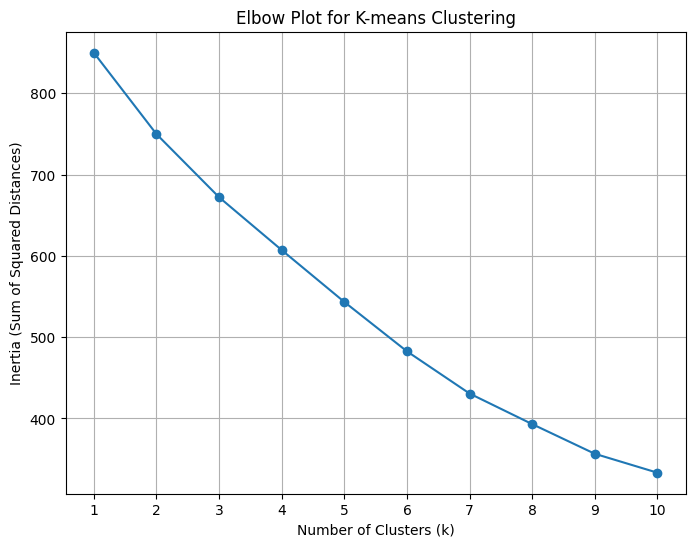


Elbow Plot Inertias for each k:
k = 1: Inertia = 850.000
k = 2: Inertia = 749.876
k = 3: Inertia = 672.182
k = 4: Inertia = 607.182
k = 5: Inertia = 543.348
k = 6: Inertia = 482.583
k = 7: Inertia = 430.660
k = 8: Inertia = 393.027
k = 9: Inertia = 356.529
k = 10: Inertia = 333.237


In [9]:
import pandas as pd                               # Import pandas for data manipulation
import matplotlib.pyplot as plt                   # Import matplotlib for plotting
from sklearn.cluster import KMeans                # Import KMeans for clustering
from sklearn.preprocessing import StandardScaler  # Import StandardScaler for data standardization
from sklearn.impute import SimpleImputer          # Import SimpleImputer for handling missing values

# ----------------- Function Definitions -----------------

def loadExcelData(filePath: str) -> pd.DataFrame:
    """
    Loads data from the first sheet of an Excel file.

    Parameters:
        filePath (str): The path to the Excel file.

    Returns:
        pd.DataFrame: DataFrame containing the loaded data.
    """
    excelFile = pd.ExcelFile(filePath)                 # Load the Excel file using the provided file path
    df = pd.read_excel(excelFile, sheet_name=excelFile.sheet_names[0])  # Read data from the first sheet
    return df                                         # Return the loaded DataFrame

def preprocessDataframe(df: pd.DataFrame) -> (object, pd.DataFrame):
    """
    Selects numerical columns from the DataFrame, imputes missing values using the mean,
    and standardizes the numerical data.

    Parameters:
        df (pd.DataFrame): The original DataFrame.

    Returns:
        dfScaled (np.ndarray): Standardized numerical data.
        dfNumeric (pd.DataFrame): DataFrame containing only numerical columns.
    """
    dfNumeric = df.select_dtypes(include=['number'])  # Select numeric columns from the DataFrame
    imputer = SimpleImputer(strategy="mean")            # Create an imputer that replaces missing values with the mean
    dfImputed = imputer.fit_transform(dfNumeric)        # Impute missing values in the numeric data
    scaler = StandardScaler()                           # Create a StandardScaler for data standardization
    dfScaled = scaler.fit_transform(dfImputed)          # Standardize the imputed data
    return dfScaled, dfNumeric                          # Return the standardized data and numeric DataFrame

def createElbowPlot(data, kRange: range) -> list:
    """
    Computes the inertia (sum of squared distances) for each k in the provided range and plots the elbow curve.

    Parameters:
        data (array-like): Standardized numerical data.
        kRange (range): Range of k values to evaluate.

    Returns:
        inertias (list): List of inertia values corresponding to each k.
    """
    inertias = []                                      # Initialize an empty list to store inertia values

    # Loop over each k value in the provided range
    for k in kRange:
        kmeansModel = KMeans(n_clusters=k, random_state=0, n_init=10)  # Initialize KMeans with the current k
        kmeansModel.fit(data)                          # Fit KMeans to the standardized data
        inertias.append(kmeansModel.inertia_)          # Append the inertia value to the list

    # Plot the elbow curve
    plt.figure(figsize=(8, 6))                         # Create a new figure with specified dimensions
    plt.plot(list(kRange), inertias, marker='o', linestyle='-')  # Plot inertia versus k values
    plt.title('Elbow Plot for K-means Clustering')     # Set the title for the plot
    plt.xlabel('Number of Clusters (k)')               # Label the x-axis
    plt.ylabel('Inertia (Sum of Squared Distances)')    # Label the y-axis
    plt.xticks(list(kRange))                           # Set the x-axis ticks to the k values
    plt.grid(True)                                     # Enable grid lines
    plt.show()                                         # Display the plot

    return inertias                                  # Return the list of inertia values

# ----------------- Main Program -----------------

if __name__ == "__main__":
    filePath = "20230409_playback_data_for_upload.xlsx"  # Specify the file path for the Excel data file
    df = loadExcelData(filePath)                        # Load the dataset using the defined function
    print("Sheet names and first few rows of the dataset loaded:")  # Print header for clarity
    print(df.head())                                  # Print the first few rows of the loaded dataset

    dfScaled, dfNumeric = preprocessDataframe(df)      # Preprocess the data: select numeric columns, impute missing values, and standardize

    kRange = range(1, 11)                              # Define the range of k values from 1 to 10 for evaluation
    inertias = createElbowPlot(dfScaled, kRange)         # Compute inertias and create the elbow plot

    # Print the inertia values for each k value
    print("\nElbow Plot Inertias for each k:")
    for k, inertia in zip(kRange, inertias):
        print(f"k = {k}: Inertia = {inertia:.3f}")
